In [1]:
from geosnap import DataStore
from geosnap.io import get_acs

from segregation.dynamics import compute_multiscalar_profile

/Users/knaaptime/mambaforge/envs/seg_networks/lib/python3.9/site-packages/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
import seaborn as sns

sns.set_context("paper")
import proplot as plt


In [3]:
store = DataStore()

/Users/knaaptime/mambaforge/envs/seg_networks/lib/python3.9/site-packages/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(


In [7]:
store.msas()[store.msas().name.str.lower().str.contains('pittsburgh')]

,geoid,name,type,geometry
684,38300,"Pittsburgh, PA",Metro Area,"POLYGON ((-80.51904 40.47736, -80.51903 40.477..."


In [44]:
pitt = get_acs(store, msa_fips='38300', years=[2019])

<AxesSubplot:>

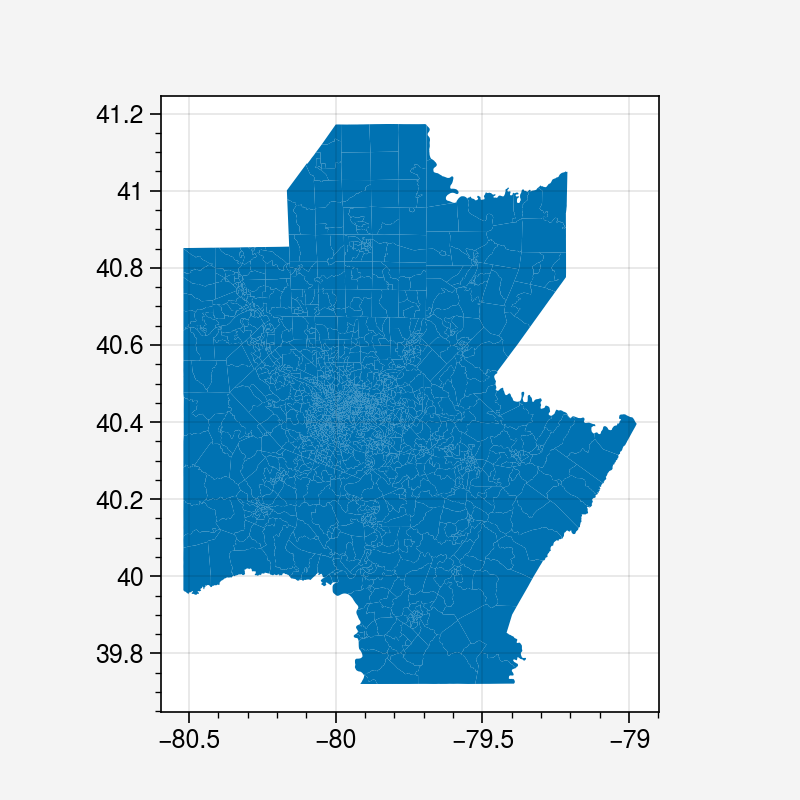

In [10]:
pitt.plot()

In [19]:
groups = ['n_nonhisp_white_persons', 'n_nonhisp_black_persons', 'n_hispanic_persons', 'n_asian_persons']

In [12]:
import pandana as pdna

In [13]:
pitt_net = pdna.Network.from_hdf5("../../../geosnap_data/metro_networks_8k/38300.h5")

Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 272409
Setting CH edge vector of size 409631
Range graph removed 88312 edges of 819262
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [14]:
from segregation.multigroup import MultiInfoTheory

In [15]:
compute_multiscalar_profile?

Signature:
compute_multiscalar_profile(
    gdf,
    segregation_index=None,
    groups=None,
    group_pop_var=None,
    total_pop_var=None,
    distances=None,
    network=None,
    decay='linear',
    function='triangular',
    precompute=True,
    **kwargs,
)
Docstring:
Compute multiscalar segregation profile.

This function calculates several Spatial Information Theory indices with
increasing distance parameters.

Parameters
----------
gdf : geopandas.GeoDataFrame
    geodataframe with rows as observations and columns as population
    variables. Note that if using a network distance, the coordinate
    system for this gdf should be 4326. If using euclidian distance,
    this must be projected into planar coordinates like state plane or UTM.
segregation_index : SpatialImplicit SegregationIndex Class
    a class from the library such as MultiInformationTheory, or MinMax
groups : list
    list of population groups for calculating multigroup indices
group_pop_var : str
    name of po

In [25]:
distances=list(range(500,5000,500))

In [26]:
distances

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

In [34]:
pitt.estimate_utm_crs()

<Derived Projected CRS: EPSG:32617>
Name: WGS 84 / UTM zone 17N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 84°W and 78°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Ecuador - north of equator. Canada - Nunavut; Ontario; Quebec. Cayman Islands. Colombia. Costa Rica. Cuba. Jamaica. Nicaragua. Panama. United States (USA).
- bounds: (-84.0, 0.0, -78.0, 84.0)
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
pitt.centroid.isnull()

/var/folders/79/cknfb1sx2pv16rztkpg6wzlw0000gn/T/ipykernel_20504/1107433510.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pitt.centroid.isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
1914    False
1915    False
1916    False
1917    False
1918    False
Length: 1919, dtype: bool

In [53]:
pitt_net.get_node_ids(pitt.centroid.y, pitt.centroid.y)

/var/folders/79/cknfb1sx2pv16rztkpg6wzlw0000gn/T/ipykernel_20504/3467584455.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pitt_net.get_node_ids(pitt.centroid.y, pitt.centroid.y)
/var/folders/79/cknfb1sx2pv16rztkpg6wzlw0000gn/T/ipykernel_20504/3467584455.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pitt_net.get_node_ids(pitt.centroid.y, pitt.centroid.y)


0       104449085
1       104449085
2       104449085
3       104449085
4       104449085
          ...    
1914    104449085
1915    104449085
1916    104449085
1917    104449085
1918    104449085
Name: node_id, Length: 1919, dtype: int64

In [55]:
pitt = pitt.to_crs(4326)

In [58]:
pitt

,geoid,n_total_housing_units,n_vacant_housing_units,n_occupied_housing_units,n_owner_occupied_housing_units,n_renter_occupied_housing_units,n_housing_units_multiunit_structures_denom,n_housing_units_multiunit_structures,n_total_housing_units_sample,median_home_value,...,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_edu_hs_less,p_edu_college_greater,p_veterans,geometry,year
0,420030103001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.874251,0.958084,0.319361,0.0,0.319361,18.785094,3.675345,6.067864,"MULTIPOLYGON (((inf inf, inf inf, inf inf, inf...",2019
1,420030103002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,5.059959,0.000000,4.445744,0.0,4.445744,3.305785,68.595041,0.087745,"MULTIPOLYGON (((inf inf, inf inf, inf inf, inf...",2019
2,420030103003,181.0,64.0,117.0,25.0,92.0,181.0,95.0,181.0,157800.0,...,0.626959,0.000000,14.106583,0.0,14.106583,11.612903,22.580645,0.940439,"MULTIPOLYGON (((inf inf, inf inf, inf inf, inf...",2019
3,420030103004,299.0,94.0,205.0,31.0,174.0,299.0,161.0,299.0,NaN,...,1.711491,0.977995,3.667482,0.0,3.667482,3.460208,45.674740,3.667482,"MULTIPOLYGON (((inf inf, inf inf, inf inf, inf...",2019
4,420030201001,455.0,48.0,407.0,157.0,250.0,455.0,424.0,455.0,408800.0,...,5.421687,0.000000,7.064622,0.0,7.064622,0.000000,74.115756,2.573932,"MULTIPOLYGON (((inf inf, inf inf, inf inf, inf...",2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,421298084023,1189.0,177.0,1012.0,877.0,135.0,1189.0,46.0,1189.0,200200.0,...,0.045025,0.000000,0.000000,0.0,0.000000,2.306425,42.339374,12.336785,"MULTIPOLYGON (((inf inf, inf inf, inf inf, inf...",2019
1915,421298085001,935.0,177.0,758.0,499.0,259.0,935.0,287.0,935.0,168100.0,...,1.209964,0.000000,0.000000,0.0,0.000000,2.209945,39.686924,12.740214,"MULTIPOLYGON (((inf inf, inf inf, inf inf, inf...",2019
1916,421298086001,1098.0,388.0,710.0,602.0,108.0,1098.0,44.0,1098.0,134400.0,...,1.547816,0.000000,0.000000,0.0,0.000000,13.384615,15.615385,4.698729,"MULTIPOLYGON (((inf inf, inf inf, inf inf, inf...",2019
1917,421298086002,661.0,102.0,559.0,503.0,56.0,661.0,0.0,661.0,162500.0,...,0.000000,0.000000,0.000000,0.0,0.000000,4.315789,24.736842,9.896730,"MULTIPOLYGON (((inf inf, inf inf, inf inf, inf...",2019


In [57]:
net_profile = compute_multiscalar_profile(pitt, 
                                          distances=list(range(500,5000,500)), 
                                          segregation_index=MultiInfoTheory, 
                                          groups=groups,
                                         network=pitt_net)

ValueError: Input contains NaN.

In [40]:
euc_profile = compute_multiscalar_profile(pitt.to_crs(5070), 
                                          distances=list(range(500,5000,500)), 
                                          segregation_index=MultiInfoTheory, groups=groups)

<AxesSubplot:xlabel='distance'>

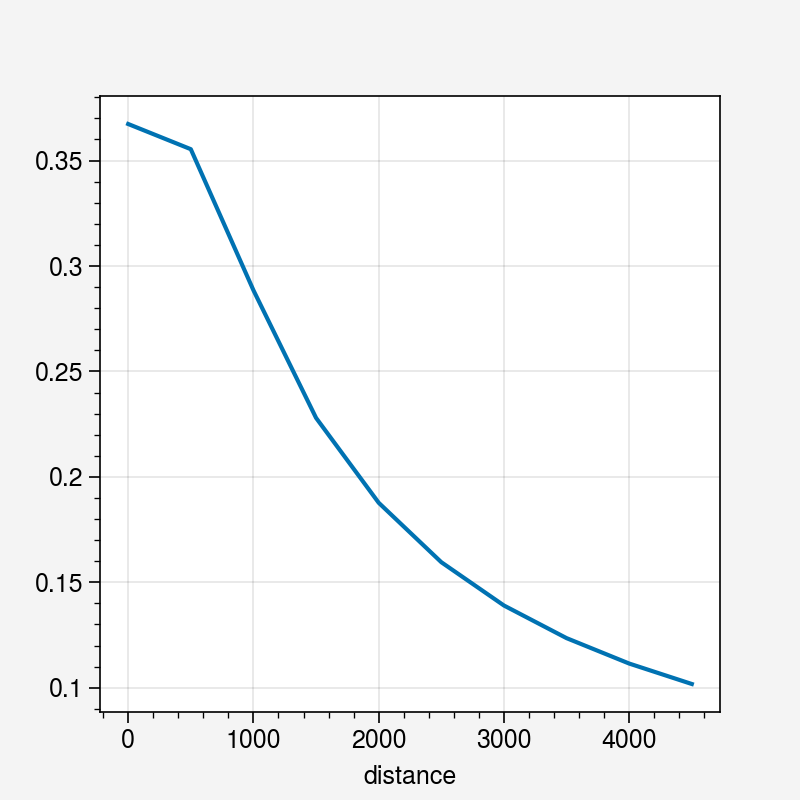

In [41]:
euc_profile.plot()